# Midterm 3 - Assignment 2

## Import all the necessary modules


In [8]:
from keras.datasets import cifar10
import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

## Load and normalize the dataset

In [3]:
(tr_set, tr_labels), (ts_set, ts_labels) = cifar10.load_data()
tr_set = tr_set.astype("float32") / 255
ts_set = ts_set.astype("float32") / 255
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

## Build the model

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(keras.layers.Conv2D(32, 3, padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Conv2D(32, 3, padding="same", activation="relu"))
model.add(keras.layers.Conv2D(32, 3, padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(2, 2, padding="same"))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

## Train the model

In [18]:
tr_labels_one_hot = keras.utils.to_categorical(tr_labels)
model.fit(tr_set, tr_labels_one_hot, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7032 - accuracy: 0.3750
Epoch 2/30
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0680 - accuracy: 0.6180
Epoch 3/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8622 - accuracy: 0.6988
Epoch 4/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7431 - accuracy: 0.7412
Epoch 5/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6458 - accuracy: 0.7725
Epoch 6/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5733 - accuracy: 0.7977
Epoch 7/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5032 - accuracy: 0.8221
Epoch 8/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4596 - accuracy: 0.8382
Epoch 9/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4265 - accuracy: 0.8485
Epoch 10/30
1563/1563 [==============================] - 7s 4ms/step - loss: 0.381

## Accuracy on test test

In [19]:
classes_tr = np.argmax(model.predict(tr_set), axis=1)
values = model.evaluate(tr_set, tr_labels_one_hot, verbose=0)
print("Training Error: {0}, Training accuracy: {1}".format(values[0], values[1]))

Training Error: 0.03217462822794914, Training accuracy: 0.9918199777603149


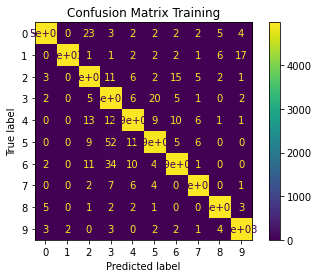

In [20]:
confusion_matrix_tr = confusion_matrix(tr_labels, classes_tr)
ConfusionMatrixDisplay(confusion_matrix_tr, np.arange(10)).plot()
plt.title("Confusion Matrix Training")
plt.show()

## Accuracy on test set

In [21]:
ts_labels_one_hot = keras.utils.to_categorical(ts_labels)
classes_ts = np.argmax(model.predict(ts_set), axis=1)
values = model.evaluate(ts_set, ts_labels_one_hot, verbose=0)
print("Test Error: {0}, Test accuracy: {1}".format(values[0], values[1]))

Test Error: 1.0487407445907593, Test accuracy: 0.7620000243186951
